In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./images/test_pattern.tif')

## Define a function that takes image as input and returns its pixel and count values

In [83]:
def hist_values(img):
    pixel_intensity = []
    if len(img.shape) > 2: #for  color image
        for i in range(img.shape[2]):
            for j in range(img.shape[0]):
                for k in range(img.shape[1]):
                    pixel_intensity.append(img[j][k][i])
    else: #for grayscale image
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                pixel_intensity.append(img[i][j])
                
    pixel, count = np.unique(pixel_intensity, return_counts = True)
    return pixel, count

## Plot the Histogram

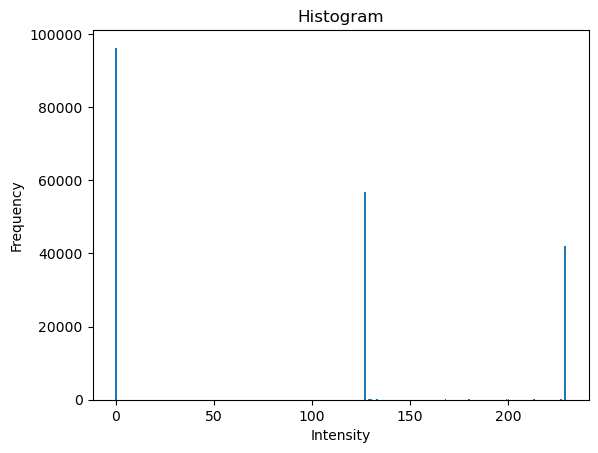

In [84]:
pixel_val, frequency = hist_values(image)
plt.bar(pixel_val, frequency)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

## Show original image

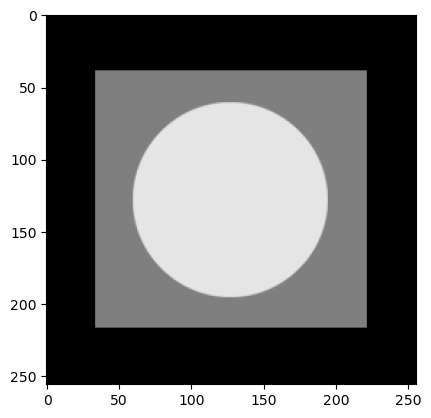

In [85]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

## Calculate size of an image and verify it from histogram using count values

In [18]:
print("Size:", image.size)
print("Counts:", sum(frequency))

Size: 196608
Counts: 196608


## Gaussian distribution

In [19]:
gaussian_noise = np.random.normal(0, 20, image.shape)

In [20]:
norm_gnoise = cv2.normalize(gaussian_noise, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)

In [21]:
new_gnoise = norm_gnoise.astype(np.uint8)

In [22]:
cv2.imshow('new gnoise', new_gnoise)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
pixels,counts = hist_values(new_gnoise)

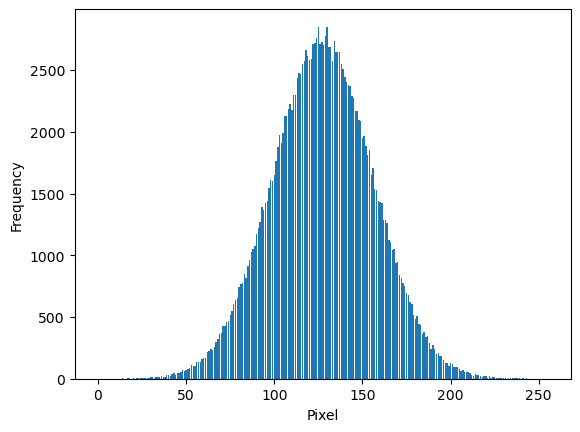

In [25]:
plt.bar(pixels, counts)
plt.xlabel('Pixel')
plt.ylabel('Frequency')
plt.show()

## Uniform Distribution

In [26]:
uniform_noise = np.random.uniform(0, 100, image.shape)

In [27]:
cv2.imshow('uniform', uniform_noise)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
norm_uniform = cv2.normalize(uniform_noise, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
new_uniform = norm_uniform.astype(np.uint8)
pixel, count = hist_values(new_uniform)

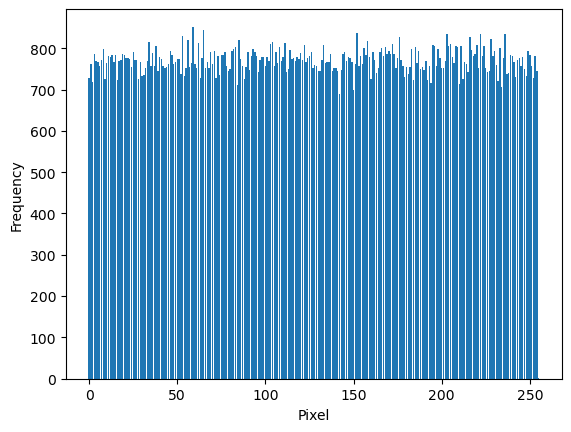

In [29]:
plt.bar(pixel, count)
plt.xlabel('Pixel')
plt.ylabel('Frequency')
plt.show()

## Rayleigh Distribution

In [30]:
rayleigh_noise = np.random.rayleigh(10, image.shape)

In [31]:
cv2.imshow('Rayleigh', rayleigh_noise)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
norm_rayleigh = cv2.normalize(rayleigh_noise, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
new_rayleigh = norm_rayleigh.astype(np.uint8)
pixel, count = hist_values(new_rayleigh)

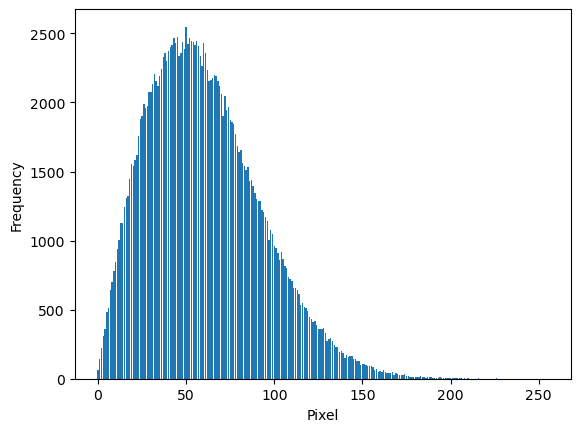

In [33]:
plt.bar(pixel, count)
plt.xlabel('Pixel')
plt.ylabel('Frequency')
plt.show()

## Exponential Distribution

In [34]:
exponentail_noise = np.random.exponential(10, image.shape)

In [35]:
cv2.imshow('Rayleigh', rayleigh_noise)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
norm_exponential = cv2.normalize(exponentail_noise, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
new_exponential = norm_exponential.astype(np.uint8)
pixel, count = hist_values(new_exponential)

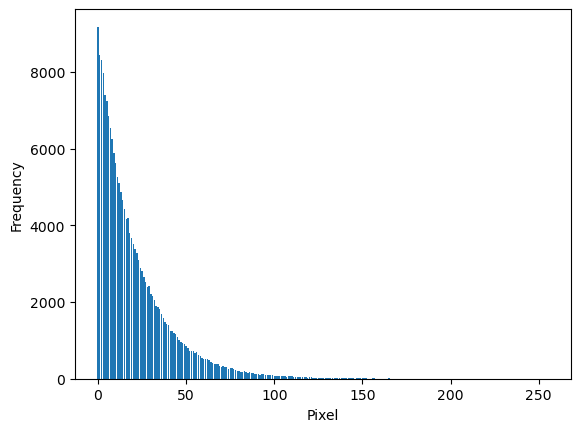

In [37]:
plt.bar(pixel, count)
plt.xlabel('Pixel')
plt.ylabel('Frequency')
plt.show()

## Generation of noisy image caused by Gaussian noise

In [38]:
gnoisy_image = image + gaussian_noise

In [39]:
norm_gnoisy_image = cv2.normalize(gnoisy_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
new_gnoisy_image = norm_gnoisy_image.astype(np.uint8)
pixel, count = hist_values(new_gnoisy_image)

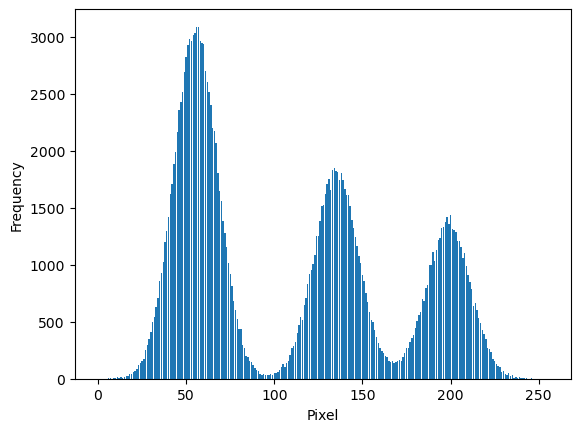

In [40]:
plt.bar(pixel, count)
plt.xlabel('Pixel')
plt.ylabel('Frequency')
plt.show()

In [41]:
cv2.imshow('noisy image', new_gnoisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Generation of noisy image caused by Uniform noise

In [42]:
unoisy_image = image + uniform_noise

In [43]:
norm_unoisy_image = cv2.normalize(unoisy_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
new_unoisy_image = norm_unoisy_image.astype(np.uint8)
pixel, count = hist_values(new_unoisy_image)

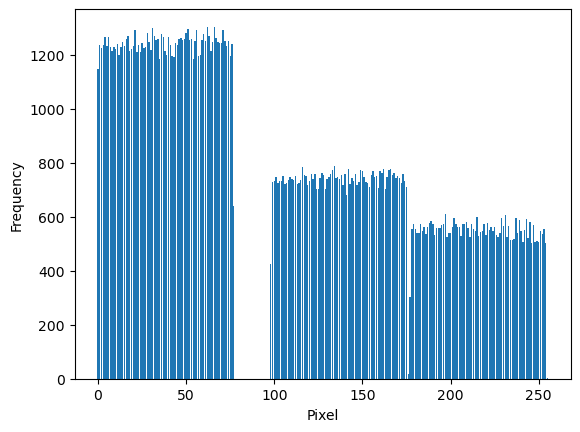

In [44]:
plt.bar(pixel, count)
plt.xlabel('Pixel')
plt.ylabel('Frequency')
plt.show()

In [45]:
cv2.imshow('noisy image', new_unoisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Generation of noisy image caused by Rayleigh noise

In [46]:
rnoisy_image = image + rayleigh_noise

In [47]:
norm_rnoisy_image = cv2.normalize(rnoisy_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
new_rnoisy_image = norm_rnoisy_image.astype(np.uint8)
pixel, count = hist_values(new_rnoisy_image)

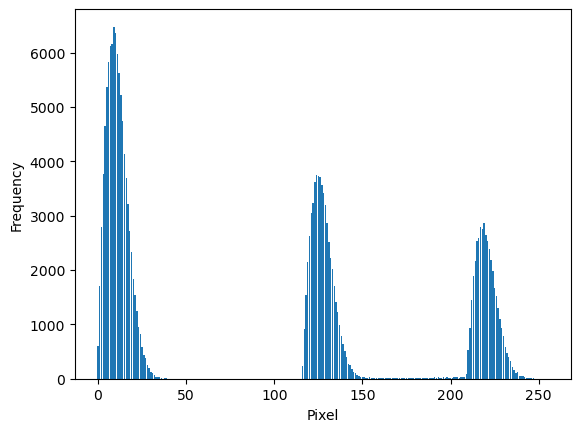

In [50]:
plt.bar(pixel, count)
plt.xlabel('Pixel')
plt.ylabel('Frequency')
plt.show()

In [51]:
cv2.imshow('noisy image', new_rnoisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Generation of noisy image caused by Exponential noise

In [52]:
enoisy_image = image + exponentail_noise

In [53]:
norm_enoisy_image = cv2.normalize(enoisy_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_32F)
new_enoisy_image = norm_enoisy_image.astype(np.uint8)
pixel, count = hist_values(new_enoisy_image)

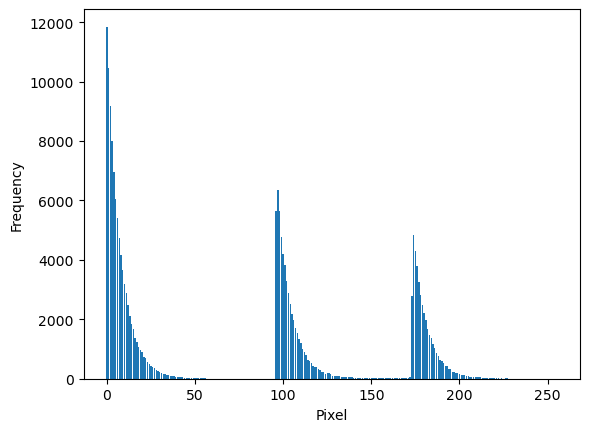

In [54]:
plt.bar(pixel, count)
plt.xlabel('Pixel')
plt.ylabel('Frequency')
plt.show()

In [55]:
cv2.imshow('noisy image', new_rnoisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Filtering the images

In [56]:
hypothetical_array = np.random.randint(0, 10, size=(7, 7))

In [57]:
filter_array = np.ones((3, 3), dtype=np.float32)

In [58]:
hypothetical_array = hypothetical_array.astype(np.float32)
convolved_array = cv2.filter2D(hypothetical_array, -1, filter_array, borderType=cv2.BORDER_ISOLATED)

In [59]:
hypothetical_array

array([[4., 0., 9., 9., 0., 9., 3.],
       [4., 9., 2., 4., 5., 2., 7.],
       [5., 6., 1., 7., 7., 7., 5.],
       [5., 0., 1., 0., 6., 1., 6.],
       [5., 1., 6., 9., 9., 5., 6.],
       [0., 5., 2., 9., 5., 5., 8.],
       [9., 9., 1., 8., 0., 1., 9.]], dtype=float32)

In [60]:
convolved_array

array([[17., 28., 33., 29., 29., 26., 21.],
       [28., 40., 47., 44., 50., 45., 33.],
       [29., 33., 30., 33., 39., 46., 28.],
       [22., 30., 31., 46., 51., 52., 30.],
       [16., 25., 33., 47., 49., 51., 31.],
       [29., 38., 50., 49., 51., 48., 34.],
       [23., 26., 34., 25., 28., 28., 23.]], dtype=float32)

## Filter with different combination of 1's and 0's

In [61]:
filter_array[0][0], filter_array[0][2], filter_array[2][0], filter_array[2][2] = 0, 0, 0, 0

In [62]:
hypothetical_array = hypothetical_array.astype(np.float32)
convolved_array = cv2.filter2D(hypothetical_array, -1, filter_array, borderType=cv2.BORDER_ISOLATED)

In [63]:
filter_array

array([[0., 1., 0.],
       [1., 1., 1.],
       [0., 1., 0.]], dtype=float32)

In [64]:
convolved_array

array([[ 8., 22., 20., 22., 23., 14., 19.],
       [22., 21., 25., 27., 18., 30., 17.],
       [20., 21., 17., 19., 32., 22., 25.],
       [15., 13.,  8., 23., 23., 25., 18.],
       [11., 17., 19., 33., 34., 26., 25.],
       [19., 17., 23., 33., 28., 24., 28.],
       [18., 24., 20., 18., 14., 15., 18.]], dtype=float32)

## Another filter with different combination of 1's and 0's

In [65]:
filter_array[1][1] = 0

In [66]:
hypothetical_array = hypothetical_array.astype(np.float32)
convolved_array = cv2.filter2D(hypothetical_array, -1, filter_array, borderType=cv2.BORDER_ISOLATED)

In [67]:
filter_array

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [68]:
convolved_array

array([[ 4., 22., 11., 13., 23.,  5., 16.],
       [18., 12., 23., 23., 13., 28., 10.],
       [15., 15., 16., 12., 25., 15., 20.],
       [10., 13.,  7., 23., 17., 24., 12.],
       [ 6., 16., 13., 24., 25., 21., 19.],
       [19., 12., 21., 24., 23., 19., 20.],
       [ 9., 15., 19., 10., 14., 14.,  9.]], dtype=float32)

## Gaussaian Kernel of 3x3 size

In [69]:
gaussian_kernel = cv2.getGaussianKernel(3,0)
gaussian_kernel_2d = np.multiply(gaussian_kernel, gaussian_kernel.transpose())

In [70]:
gaussian_kernel_2d

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [71]:
hypothetical_array = hypothetical_array.astype(np.float32)
convolved_array = cv2.filter2D(hypothetical_array, -1, gaussian_kernel_2d, borderType=cv2.BORDER_ISOLATED)

In [72]:
convolved_array

array([[2.0625, 3.125 , 4.4375, 4.3125, 3.25  , 3.625 , 2.875 ],
       [3.625 , 4.9375, 4.75  , 4.9375, 4.875 , 4.9375, 4.    ],
       [3.6875, 4.125 , 3.0625, 4.125 , 5.3125, 5.125 , 3.9375],
       [2.9375, 2.6875, 2.5625, 4.3125, 5.375 , 4.9375, 3.75  ],
       [2.3125, 2.75  , 4.    , 6.125 , 6.3125, 5.4375, 4.25  ],
       [3.    , 4.0625, 4.8125, 6.25  , 5.5625, 5.125 , 4.875 ],
       [3.6875, 4.25  , 3.5   , 3.6875, 2.625 , 2.8125, 3.6875]],
      dtype=float32)

## Blurring image using box filter

In [73]:
unblurred_img = cv2.imread('./images/unblurred_pattern.tif')
unblurred_img_rgb = cv2.cvtColor(unblurred_img, cv2.COLOR_BGR2RGB)
box_filtered = cv2.boxFilter(unblurred_img_rgb, -1, ksize=(21,21))

Text(0.5, 1.0, 'Unblurred image')

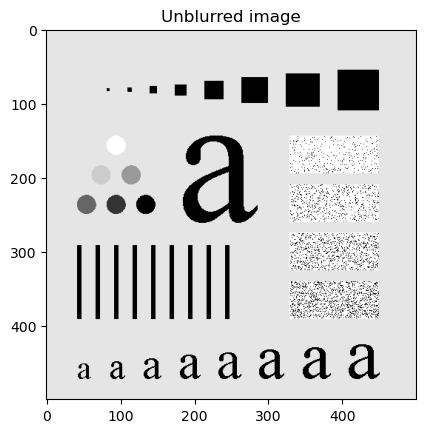

In [74]:
plt.imshow(unblurred_img)
plt.title('Unblurred image')

Text(0.5, 1.0, 'Box Filtered Image')

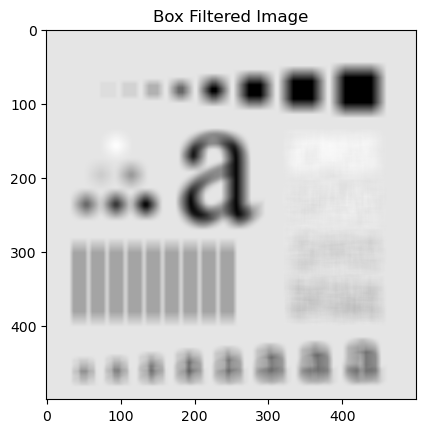

In [75]:
plt.imshow(box_filtered)
plt.title('Box Filtered Image')

## Blurring image using gaussian blur filter

In [76]:
unblurred_img = cv2.imread('./images/unblurred_pattern.tif')
unblurred_img_rgb = cv2.cvtColor(unblurred_img, cv2.COLOR_BGR2RGB)
gaussian_filtered = cv2.GaussianBlur(unblurred_img, (21,21), 20)

Text(0.5, 1.0, 'Gaussian Blurred image')

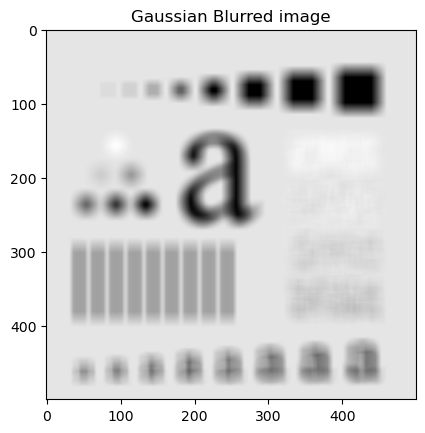

In [77]:
plt.imshow(gaussian_filtered)
plt.title('Gaussian Blurred image')

## Blurring Image Using Median Filter

In [78]:
unblurred_img = cv2.imread('./images/noisy_pattern.tif')
median_blurred = cv2.medianBlur(unblurred_img, 3)

Text(0.5, 1.0, 'Unblurred image')

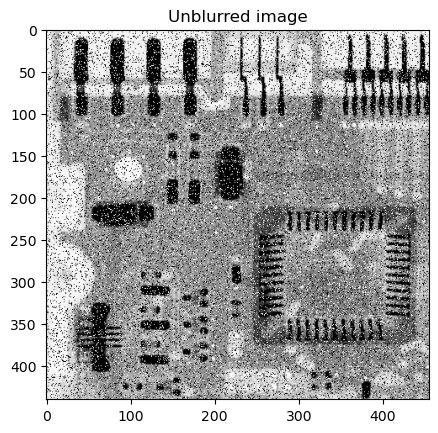

In [79]:
plt.imshow(unblurred_img)
plt.title('Unblurred image')

Text(0.5, 1.0, 'Median Blurred image')

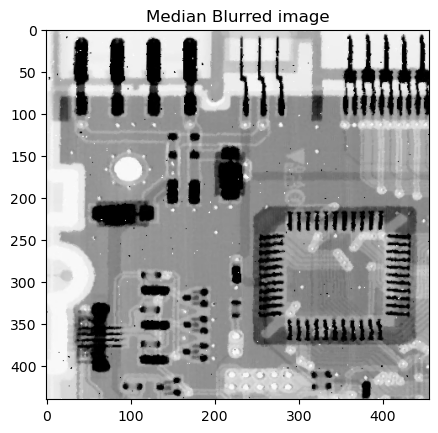

In [80]:
plt.imshow(median_blurred)
plt.title('Median Blurred image')